In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data_dir = '/content/drive/MyDrive/Dataset General/AI in Medical/Chest Cancer/train'
test_data_dir = '/content/drive/MyDrive/Dataset General/AI in Medical/Chest Cancer/test'

img_height, img_width = 224, 224
batch_size = 32


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=False
)


Found 701 images belonging to 4 classes.
Found 282 images belonging to 4 classes.


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # Use 'softmax' for multi-class classification
])


# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:

model.compile(
    loss='categorical_crossentropy',  # Use categorical cross-entropy for multi-class
    optimizer='adam',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    batch_size=80,
    validation_data=test_generator
)


Epoch 1/10
22/22 [==============================] - 66s 3s/step - loss: 0.7080 - accuracy: 0.6805 - val_loss: 1.2840 - val_accuracy: 0.5461
Epoch 2/10
22/22 [==============================] - 62s 3s/step - loss: 0.6848 - accuracy: 0.6833 - val_loss: 1.3574 - val_accuracy: 0.5426
Epoch 3/10
22/22 [==============================] - 69s 3s/step - loss: 0.6939 - accuracy: 0.6705 - val_loss: 1.2543 - val_accuracy: 0.5780
Epoch 4/10
22/22 [==============================] - 70s 3s/step - loss: 0.5968 - accuracy: 0.7147 - val_loss: 1.4822 - val_accuracy: 0.5603
Epoch 5/10
22/22 [==============================] - 62s 3s/step - loss: 0.6846 - accuracy: 0.6690 - val_loss: 1.4177 - val_accuracy: 0.4752
Epoch 6/10
22/22 [==============================] - 77s 4s/step - loss: 0.6280 - accuracy: 0.7247 - val_loss: 1.6543 - val_accuracy: 0.5709
Epoch 7/10
22/22 [==============================] - 65s 3s/step - loss: 0.6109 - accuracy: 0.7275 - val_loss: 1.6330 - val_accuracy: 0.5213
Epoch 8/10
22/22 [==

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc * 100:.2f}%')


9/9 [==============================] - 6s 631ms/step - loss: 1.2023 - accuracy: 0.5745
Test accuracy: 57.45%


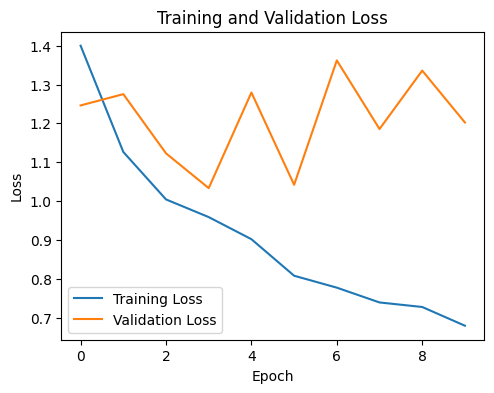

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


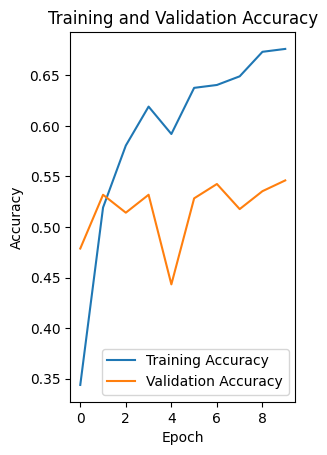

In [ ]:

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [ ]:

# Predict the classes for the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

9/9 [==============================] - 12s 1s/step


In [ ]:
# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
confusion_mtx


Confusion Matrix:


array([[67,  7, 15,  0],
       [14, 31,  4,  0],
       [ 0,  0, 54,  0],
       [75,  0, 13,  2]])

In [ ]:

# Generate the classification report
class_labels = list(test_generator.class_indices.keys())
class_report = classification_report(y_true, y_pred_classes, target_names=class_labels)

# Print the classification report
print("Classification Report:")
print(class_report)

Classification Report:
                         precision    recall  f1-score   support

         adenocarcinoma       0.43      0.75      0.55        89
   large.cell.carcinoma       0.82      0.63      0.71        49
                 normal       0.63      1.00      0.77        54
squamous.cell.carcinoma       1.00      0.02      0.04        90

               accuracy                           0.55       282
              macro avg       0.72      0.60      0.52       282
           weighted avg       0.72      0.55      0.46       282



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3), padding='same', strides=(1, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),  # Add dropout with a 25% dropout rate

    layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=(1, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),  # Add dropout with a 25% dropout rate

    layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=(1, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),  # Add dropout with a 25% dropout rate

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Add dropout with a 50% dropout rate
    layers.Dense(4, activation='softmax')
])

# Print model summary
model.summary()


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
history = model.fit(, epochs=100, validation_data=test, callbacks=[early_stopping])